In [1]:
import numpy as np
import pandas as pd
import scipy.optimize
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data

,material,V1,V2,V3,V4,o1,o2,o3,o4,d1,d2
0,eb-eb,1.10,2.07,1.10,0.11,4,1,3,2,3.8,3.8
1,eb-pg,1.02,2.00,1.09,0.11,4,1,3,2,3.8,4.8
2,eb-sx,1.42,1.96,1.53,0.15,4,1,3,2,3.8,1.6
3,eb-tx,1.22,2.04,1.28,0.13,4,1,3,2,3.8,4.3
4,eb-gx,1.42,2.00,1.47,0.14,4,1,3,2,3.8,1.8
5,pg-eb,1.13,1.08,2.11,0.08,4,1,2,3,4.8,3.8
6,sx-eb,0.70,0.64,2.06,0.14,4,1,2,3,1.6,3.8
7,tx-eb,0.95,0.84,2.08,0.10,4,1,2,3,4.3,3.8
8,gx-eb,0.79,0.66,2.06,0.12,4,1,2,3,1.8,3.8


In [3]:
dV = 0.01
d_err = 0.1

In [4]:
print(data.loc[:, 'material':].to_latex())

\begin{tabular}{llrrrrrrrrrr}
\toprule
{} & material &    V1 &    V2 &    V3 &    V4 &  o1 &  o2 &  o3 &  o4 &   d1 &   d2 \\
\midrule
0 &    eb-eb &  1.10 &  2.07 &  1.10 &  0.11 &   4 &   1 &   3 &   2 &  3.8 &  3.8 \\
1 &    eb-pg &  1.02 &  2.00 &  1.09 &  0.11 &   4 &   1 &   3 &   2 &  3.8 &  4.8 \\
2 &    eb-sx &  1.42 &  1.96 &  1.53 &  0.15 &   4 &   1 &   3 &   2 &  3.8 &  1.6 \\
3 &    eb-tx &  1.22 &  2.04 &  1.28 &  0.13 &   4 &   1 &   3 &   2 &  3.8 &  4.3 \\
4 &    eb-gx &  1.42 &  2.00 &  1.47 &  0.14 &   4 &   1 &   3 &   2 &  3.8 &  1.8 \\
5 &    pg-eb &  1.13 &  1.08 &  2.11 &  0.08 &   4 &   1 &   2 &   3 &  4.8 &  3.8 \\
6 &    sx-eb &  0.70 &  0.64 &  2.06 &  0.14 &   4 &   1 &   2 &   3 &  1.6 &  3.8 \\
7 &    tx-eb &  0.95 &  0.84 &  2.08 &  0.10 &   4 &   1 &   2 &   3 &  4.3 &  3.8 \\
8 &    gx-eb &  0.79 &  0.66 &  2.06 &  0.12 &   4 &   1 &   2 &   3 &  1.8 &  3.8 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_109463/3874119133.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.loc[:, 'material':].to_latex())


In [5]:
a = np.array([0.89, 0.87, 0.87, 0.84])

In [6]:
temperatures = pd.DataFrame(columns=['material', 'T1', 'T2', 'T3', 'T4', 'd1', 'd2'])
errors = pd.DataFrame(columns=['T1_err', 'T2_err', 'T3_err', 'T4_err'])
for i in range(len(data)):
    V = np.array(data.loc[i]['V1':'V4'], dtype=float)
    order = np.array(data.loc[i]['o1':'o4'], dtype=int)
    T = (V/a)[order-1]
    T_err = (V/a * np.sqrt((dV/V)**2 + (dV/a)**2))[order-1]
    
    temperatures.loc[i, 'material'] = data.loc[i, 'material']
    temperatures.loc[i, 'd1'] = data.loc[i, 'd1']    
    temperatures.loc[i, 'd2'] = data.loc[i, 'd2']
    temperatures.loc[i, 'T1':'T4'] = T
    
    errors.loc[i, 'T1_err':'T4_err'] = T_err

errors

,T1_err,T2_err,T3_err,T4_err
0,0.012006,0.017863,0.018529,0.029666
1,0.012006,0.01709,0.018426,0.028815
2,0.012093,0.021157,0.023253,0.028332
3,0.012046,0.019065,0.020448,0.029301
4,0.012069,0.021157,0.022568,0.028815
5,0.011959,0.018159,0.018323,0.030154
6,0.012069,0.014295,0.014269,0.029544
7,0.011989,0.016434,0.015978,0.029788
8,0.012026,0.015024,0.014427,0.029544


In [7]:
temperatures

,material,T1,T2,T3,T4,d1,d2
0,eb-eb,0.130952,1.235955,1.264368,2.37931,3.8,3.8
1,eb-pg,0.130952,1.146067,1.252874,2.298851,3.8,4.8
2,eb-sx,0.178571,1.595506,1.758621,2.252874,3.8,1.6
3,eb-tx,0.154762,1.370787,1.471264,2.344828,3.8,4.3
4,eb-gx,0.166667,1.595506,1.689655,2.298851,3.8,1.8
5,pg-eb,0.095238,1.269663,1.241379,2.425287,4.8,3.8
6,sx-eb,0.166667,0.786517,0.735632,2.367816,1.6,3.8
7,tx-eb,0.119048,1.067416,0.965517,2.390805,4.3,3.8
8,gx-eb,0.142857,0.88764,0.758621,2.367816,1.8,3.8


In [8]:
kappas = pd.DataFrame(columns=['material', 'dT1', 'dT2', 'd1', 'd2', 'k/k_eb', 'err'])

for i in range(len(temperatures)):
    kappas.loc[i, 'material'] = temperatures.loc[i, 'material']
    kappas.loc[i, 'd1'] = temperatures.loc[i, 'd1']    
    kappas.loc[i, 'd2'] = temperatures.loc[i, 'd2']
    
    dT1 = temperatures.loc[i, 'T2'] - temperatures.loc[i, 'T1']
    dT2 = temperatures.loc[i, 'T4'] - temperatures.loc[i, 'T3']
    d1 = temperatures.loc[i, 'd1']
    d2 = temperatures.loc[i, 'd2']
    
    dT1_err = np.sqrt(errors.loc[i, 'T1_err']**2 + errors.loc[i, 'T2_err']**2)
    dT2_err = np.sqrt(errors.loc[i, 'T3_err']**2 + errors.loc[i, 'T4_err']**2)
    
    kappa_ratio = (d1 * dT2) / (d2 * dT1)
    kappa_ratio_err = kappa_ratio * np.sqrt((d_err/d1)**2 + (d_err/d2)**2 + (dT1_err/dT1)**2 + (dT2_err/dT2)**2)
    
    
    if kappas.loc[i, 'material'].startswith('eb'):
        kappa_ratio = 1 / kappa_ratio
        kappa_ratio_err = kappa_ratio_err / (kappa_ratio**2)
    
    kappas.loc[i, 'dT1'] = dT1
    kappas.loc[i, 'dT2'] = dT2
    kappas.loc[i, 'k/k_eb'] = kappa_ratio
    kappas.loc[i, 'err'] = kappa_ratio_err

kappas

,material,dT1,dT2,d1,d2,k/k_eb,err
0,eb-eb,1.105003,1.114943,3.8,3.8,0.991085,0.053854
1,eb-pg,1.015115,1.045977,3.8,4.8,1.225888,0.02778
2,eb-sx,1.416934,0.494253,3.8,1.6,1.207082,0.057967
3,eb-tx,1.216025,0.873563,3.8,4.3,1.57519,0.014587
4,eb-gx,1.428839,0.609195,3.8,1.8,1.111004,0.063902
5,pg-eb,1.174425,1.183908,4.8,3.8,1.273358,0.061827
6,sx-eb,0.61985,1.632184,1.6,3.8,1.108712,0.085261
7,tx-eb,0.948368,1.425287,4.3,3.8,1.700632,0.080774
8,gx-eb,0.744783,1.609195,1.8,3.8,1.023453,0.071378


In [9]:
print(kappas.to_latex())

\begin{tabular}{llllllll}
\toprule
{} & material &       dT1 &       dT2 &   d1 &   d2 &    k/k\_eb &       err \\
\midrule
0 &    eb-eb &  1.105003 &  1.114943 &  3.8 &  3.8 &  0.991085 &  0.053854 \\
1 &    eb-pg &  1.015115 &  1.045977 &  3.8 &  4.8 &  1.225888 &   0.02778 \\
2 &    eb-sx &  1.416934 &  0.494253 &  3.8 &  1.6 &  1.207082 &  0.057967 \\
3 &    eb-tx &  1.216025 &  0.873563 &  3.8 &  4.3 &   1.57519 &  0.014587 \\
4 &    eb-gx &  1.428839 &  0.609195 &  3.8 &  1.8 &  1.111004 &  0.063902 \\
5 &    pg-eb &  1.174425 &  1.183908 &  4.8 &  3.8 &  1.273358 &  0.061827 \\
6 &    sx-eb &   0.61985 &  1.632184 &  1.6 &  3.8 &  1.108712 &  0.085261 \\
7 &    tx-eb &  0.948368 &  1.425287 &  4.3 &  3.8 &  1.700632 &  0.080774 \\
8 &    gx-eb &  0.744783 &  1.609195 &  1.8 &  3.8 &  1.023453 &  0.071378 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_109463/4114802036.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kappas.to_latex())


In [10]:
print(kappas[['material', 'k/k_eb', 'err']].to_latex())

\begin{tabular}{llll}
\toprule
{} & material &    k/k\_eb &       err \\
\midrule
0 &    eb-eb &  0.991085 &  0.053854 \\
1 &    eb-pg &  1.225888 &   0.02778 \\
2 &    eb-sx &  1.207082 &  0.057967 \\
3 &    eb-tx &   1.57519 &  0.014587 \\
4 &    eb-gx &  1.111004 &  0.063902 \\
5 &    pg-eb &  1.273358 &  0.061827 \\
6 &    sx-eb &  1.108712 &  0.085261 \\
7 &    tx-eb &  1.700632 &  0.080774 \\
8 &    gx-eb &  1.023453 &  0.071378 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_109463/2625837694.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kappas[['material', 'k/k_eb', 'err']].to_latex())


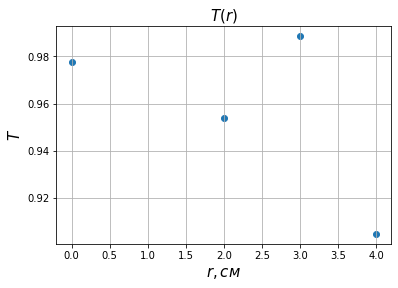

In [14]:
V = np.array([0.87, 0.83, 0.86, 0.76])
R = np.array([0, 2, 3, 4])
T = V/a
plt.figure(figsize=(6,4))
plt.grid()
plt.title('$T(r)$', fontsize=15)
plt.xlabel(r'$r, см$', {'fontsize':15})
plt.ylabel(r'$T$', {'fontsize':15})
plt.scatter(R, T)
plt.savefig('../pictures/T_r.png')

In [15]:
print(str(np.round(T,4)).replace(' ', ' & '))

[0.9775 & 0.954 &  & 0.9885 & 0.9048]


[-0.0044457   0.97507568]
[0.97752809 0.95402299 0.9047619 ]


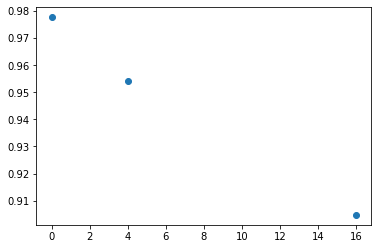

In [16]:
V = np.array([0.87, 0.83, 0.76])
R = np.array([0, 2, 4])
T = V / a[[0, 1, 3]]
plt.scatter(R**2, T)
print(np.polyfit(R**2, T, deg=1))
print(T)